# Welcome to Assignment 4 -- Part 1

In this part of the assignment, wou will train a simple Vanilla RNN and LSTM model on Adding Problem using `PyTorch`

This file is a Jupyter Notebook. You can double-click on section headers to show code and run each section with Shift+Enter.


**IMPORTANT:** You will need to make a copy of this notebook in your Google Drive before you can edit the homework files. You can do so with **File &rarr; Save a copy in Drive**.

In [1]:
#@title ## 0.1 Mounting your Drive and setting up mount symlink.

#@markdown By executing this cell, you will mount your Google Drive, set
#@markdown up mount symlink, and apt install requirements.

#@markdown Your work will be stored in a folder called `ece421_f2024_A4_folder`
#@markdown by default to prevent Colab instance timeouts from deleting your
#@markdown edits.


import os
from google.colab import drive
from importlib import reload
drive.mount('/content/gdrive', force_remount=True)

## setting the path parameters and creating the folder if needed
DRIVE_PATH = '/content/gdrive/MyDrive/ece421_f2024_A4_folder'
DRIVE_PYTHON_PATH = DRIVE_PATH.replace('\\', '')
if not os.path.exists(DRIVE_PYTHON_PATH):
  %mkdir $DRIVE_PATH

## make a symlink
SYM_PATH = '/content/ece421_f2024_A4_folder'
if not os.path.exists(SYM_PATH):
  !ln -s $DRIVE_PATH $SYM_PATH

!apt install the requirements
!apt update
!apt install -y --no-install-recommends \
        build-essential \
        curl \
        git \
        gnupg2 \
        make \
        cmake \
        ffmpeg \
        swig \
        libz-dev \
        unzip \
        zlib1g-dev \
        libglfw3 \
        libglfw3-dev \
        libxrandr2 \
        libxinerama-dev \
        libxi6 \
        libxcursor-dev \
        libgl1-mesa-dev \
        libgl1-mesa-glx \
        libglew-dev \
        libosmesa6-dev \
        lsb-release \
        ack-grep \
        patchelf \
        wget \
        xpra \
        xserver-xorg-dev \
        ffmpeg
!apt-get install python-opengl -y
!apt install xvfb -y

Mounted at /content/gdrive
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package requirements
Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:5 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:9 https://r2u.stat.illinois.edu/ubuntu jammy/main amd64 Packages [2,621 kB]
Get:10 http://archive.ubuntu.com/ubuntu jammy-updates/universe amd64 Packages [1,513 kB]
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu 

In [ ]:
#@title ## 0.2 Cloning homework repository

#@markdown We do not want to mess up with your changes to the previous
#@markdown assignment. So, we create a new directory, named
#@markdown `ece421_f2024_A4_folder`, and will clone the latest version of the
#@markdown assignments repository there.

#@markdown Similar to the previous assignments, you may be promped to restart
#@markdown your session.
#@markdown We will reset the working directory and reload the required modules
#@markdown in the following cells.

#@markdown **NOTE:** By executing this cell, the assignment files will be
#@markdown downloaded to you google drive. You can click on the folder icon on
#@markdown the left panel and navigate through the assignment directory. To
#@markdown start editing a file in this assignment, you can navigate to the file
#@markdown using the left panel and double click on it.

#@markdown **NOTE:** You just need to run this cell once.


A4_SYM_PATH = '/content/gdrive/MyDrive/ece421_f2024_A4_folder'
%cd $A4_SYM_PATH

!git clone https://github.com/erfanmeskar/ece421fall24_assignments.git

REPO_PATH = '/content/gdrive/MyDrive/ece421_f2024_A4_folder/ece421fall24_assignments'
%cd $REPO_PATH

/content/gdrive/MyDrive/ece421_f2024_A4_folder
Cloning into 'ece421fall24_assignments'...
remote: Enumerating objects: 83, done.
remote: Counting objects: 100% (83/83), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 83 (delta 24), reused 71 (delta 15), pack-reused 0 (from 0)
Receiving objects: 100% (83/83), 24.52 MiB | 17.13 MiB/s, done.
Resolving deltas: 100% (24/24), done.
/content/gdrive/MyDrive/ece421_f2024_A4_folder/ece421fall24_assignments


In [2]:
#@title ## 0.3 Importing the required modules


ASSIGNMENT_PATH = '/content/gdrive/MyDrive/ece421_f2024_A4_folder/ece421fall24_assignments/A4'
%cd $ASSIGNMENT_PATH

from importlib import reload
import numpy as np
import random
import pickle as pk
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, Dataset

import train
import make_dataset
import models
import TrainRNN
import TrainLSTM
import util

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

/content/gdrive/MyDrive/ece421_f2024_A4_folder/ece421fall24_assignments/A4


# 1. Adding Problem with Vanilla RNN and LSTM

In [3]:
#@title Playing around with a very small dataset

#@markdown In the `make_dataset.py` file, we provided you a dataset constructor
#@markdown which you will be using for this assignment. By calling the function
#@markdown `make_adding_train_val_dataset` from `make_dataset.py`, you can
#@markdown create a dataset for our Adding Problem, which will be used to train
#@markdown your single layer vanilla RNN and LSTM models.

#@markdown You do not need to modify `make_dataset.py`. However, I strongly
#@markdown suggest you to skim through this file to understand how the dataset
#@markdown was generated. Moreover, there are some comments in this file which
#@markdown you may find helpful with implementing the other parts of this
#@markdown assignment.

#@markdown - Use type() to checkout the type of this dataset. What do you see?

#@markdown - How can you find the number of datapoints in this dataset?
#@markdown Any custome made subclass of torch.utils.data.Dataset must implement
#@markdown a __ len__ () method. You can use that to find the number of
#@markdown datapoints in your dataset. Or, simply use the shorthand len(). For
#@markdown instance, you can use len(MyDataset) instead of MyDataset.__ len__ ().

#@markdown - How can we show the kth datapoint in this dataset? This can be done
#@markdown simply by regular indexing that we would use for datastructures like
#@markdown list. For instance, MyDataset[k-1] gives you the k_th datapoint.

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)
reload(TrainLSTM)

from make_dataset import make_adding_train_val_dataset

ToyTrainSet, ToyValSet = make_adding_train_val_dataset(train_count=20,
                                                        val_count=4,
                                                        sequence_length=10)


print(f"ToyTrainset is an object of our custom made class: {type(ToyTrainSet)}")
print(f"Its parent class is: {ToyTrainSet.__class__.__bases__}")

print(f"\nThere are {len(ToyTrainSet)} datapoints in the training set")
print(f"There are {ToyValSet.__len__()} datapoints in the test set")

datapoint_1 = ToyTrainSet[0]
print(f"\nFirst datapoint in the dataset:\n{datapoint_1}")

print(f"\nnFirst datapoint: Input sequence size\n {datapoint_1[0].size()}")
print(f"\nFirst datapoint: Label size\n {datapoint_1[1].size()}")

ToyTrainset is an object of our custom made class: <class 'make_dataset.CustomAddingDataset'>
Its parent class is: (<class 'torch.utils.data.dataset.Dataset'>,)

There are 20 datapoints in the training set
There are 4 datapoints in the test set

First datapoint in the dataset:
(tensor([[0.7644, 0.0000],
        [0.4867, 0.0000],
        [0.0546, 1.0000],
        [0.9431, 0.0000],
        [0.2407, 0.0000],
        [0.0032, 0.0000],
        [0.4916, 1.0000],
        [0.2396, 0.0000],
        [0.7397, 0.0000],
        [0.6093, 0.0000]], device='cuda:0'), tensor([[0.5463]], device='cuda:0'))

nFirst datapoint: Input sequence size
 torch.Size([10, 2])

First datapoint: Label size
 torch.Size([1, 1])


In [5]:
#@title ## 1.1 Generating a Datasets with Sequence Length of 10, 25, and 50

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)

from make_dataset import make_adding_train_val_dataset

# Let's Generate a dataset with 10000 training datapoints and 1000 validation
# datapoints. Each dapoint has a sequence length of 10
Add10Trainset, Add10Valset = make_adding_train_val_dataset(train_count=10000,
                                                           val_count=1000,
                                                           sequence_length=10)

Add25Trainset, Add25Valset = make_adding_train_val_dataset(train_count=10000,
                                                           val_count=1000,
                                                           sequence_length=25)

Add50Trainset, Add50Valset = make_adding_train_val_dataset(train_count=10000,
                                                           val_count=1000,
                                                           sequence_length=50)

Epoch 1 -------------------
Train Avg loss: 0.156365
Test  Avg loss: 0.162249
Epoch 2 -------------------
Train Avg loss: 0.129437
Test  Avg loss: 0.135971
Epoch 3 -------------------
Train Avg loss: 0.103872
Test  Avg loss: 0.109559
Epoch 4 -------------------
Train Avg loss: 0.028240
Test  Avg loss: 0.029629
Epoch 5 -------------------
Train Avg loss: 0.008548
Test  Avg loss: 0.009131
Epoch 6 -------------------
Train Avg loss: 0.008784
Test  Avg loss: 0.008656
Epoch 7 -------------------
Train Avg loss: 0.004725
Test  Avg loss: 0.004899
Epoch 8 -------------------
Train Avg loss: 0.008914
Test  Avg loss: 0.009022
Epoch 9 -------------------
Train Avg loss: 0.003168
Test  Avg loss: 0.003216
Epoch 10 -------------------
Train Avg loss: 0.002739
Test  Avg loss: 0.002815
Epoch 11 -------------------
Train Avg loss: 0.002832
Test  Avg loss: 0.002882
Epoch 12 -------------------
Train Avg loss: 0.002453
Test  Avg loss: 0.002546
Epoch 13 -------------------
Train Avg loss: 0.002642
Test  A

Train Avg loss: 0.000661
Test  Avg loss: 0.000644
Done!


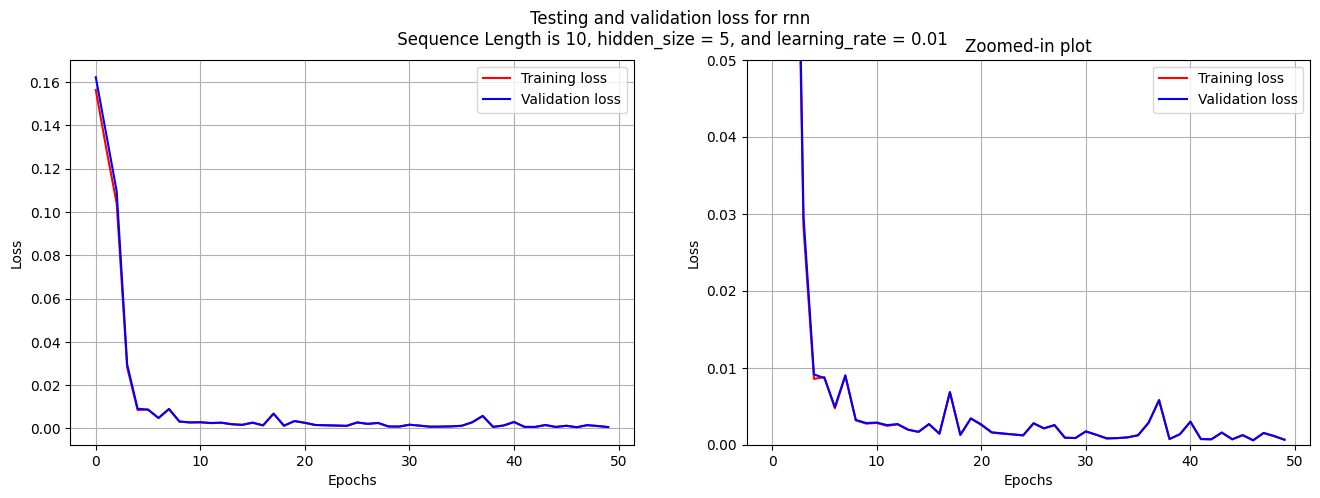

In [ ]:
#@title ## 1.2 Find the best **vanilla RNN** model for the dataset with sequence_length=10

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)


# What should be the value of RNN_input_size and RNN_output_size?
RNN_input_size = 2
RNN_output_size = 1

# Performed a grid search over the hyperparameters below
opt_name = 'adam' # let's stick to adam.
RNN_hidden_size = 5 # choose from 5, or 15
learning_rate = 0.01 # choose from 0.1, 0.01, or 0.001

RNNmodel10, train_loss10, val_loss10 = \
  TrainRNN.train1LayerVanillaRNN(Add10Trainset,
                                   Add10Valset,
                                   RNN_input_size,
                                   RNN_output_size,
                                   RNN_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   batch_size=64,
                                   max_epoch=50)


# Plot the loss value for train/test set for each epoch
util.plot_loss(train_loss10,
          val_loss10,
          sequence_len=10,
          hidden_size=RNN_hidden_size,
          lr=learning_rate,
          model_type='rnn')

Epoch 1 -------------------
Train Avg loss: 0.166263
Test  Avg loss: 0.174400
Epoch 2 -------------------
Train Avg loss: 0.165811
Test  Avg loss: 0.174140
Epoch 3 -------------------
Train Avg loss: 0.165273
Test  Avg loss: 0.175584
Epoch 4 -------------------
Train Avg loss: 0.164961
Test  Avg loss: 0.175000
Epoch 5 -------------------
Train Avg loss: 0.165288
Test  Avg loss: 0.172959
Epoch 6 -------------------
Train Avg loss: 0.164702
Test  Avg loss: 0.172362
Epoch 7 -------------------
Train Avg loss: 0.164721
Test  Avg loss: 0.173372
Epoch 8 -------------------
Train Avg loss: 0.165561
Test  Avg loss: 0.172156
Epoch 9 -------------------
Train Avg loss: 0.164987
Test  Avg loss: 0.172716
Epoch 10 -------------------
Train Avg loss: 0.163864
Test  Avg loss: 0.172141
Epoch 11 -------------------
Train Avg loss: 0.163008
Test  Avg loss: 0.171495
Epoch 12 -------------------
Train Avg loss: 0.168836
Test  Avg loss: 0.179031
Epoch 13 -------------------
Train Avg loss: 0.157289
Test  A

Train Avg loss: 0.005358
Test  Avg loss: 0.005459
Done!


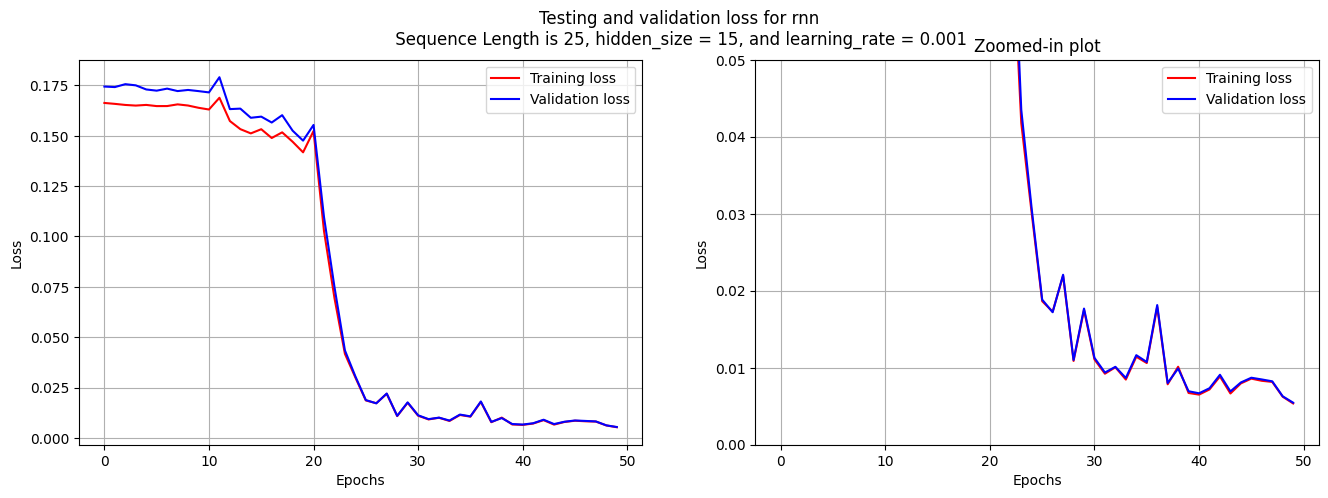

In [ ]:
#@title ## 1.3 Find the best **vanilla RNN** model for the dataset with sequence_length=25

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)


# What should be the value of RNN_input_size and RNN_output_size?
RNN_input_size = 2
RNN_output_size = 1

# Performed a grid search over the hyperparameters below
opt_name = 'adam' # let's stick to adam.
RNN_hidden_size = 15 # choose from 5, or 15
learning_rate = 0.001 # choose from 0.1, 0.01, or 0.001

RNNmodel25, train_loss25, val_loss25 = \
  TrainRNN.train1LayerVanillaRNN(Add25Trainset,
                                   Add25Valset,
                                   RNN_input_size,
                                   RNN_output_size,
                                   RNN_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   batch_size=64,
                                   max_epoch=50)

# Plot the loss value for train/test set for each epoch
util.plot_loss(train_loss25,
          val_loss25,
          sequence_len=25,
          hidden_size=RNN_hidden_size,
          lr=learning_rate,
          model_type='rnn')

Epoch 1 -------------------
Train Avg loss: 0.173217
Test  Avg loss: 0.170199
Epoch 2 -------------------
Train Avg loss: 0.168700
Test  Avg loss: 0.165219
Epoch 3 -------------------
Train Avg loss: 0.168370
Test  Avg loss: 0.167641
Epoch 4 -------------------
Train Avg loss: 0.168497
Test  Avg loss: 0.164637
Epoch 5 -------------------
Train Avg loss: 0.168136
Test  Avg loss: 0.166012
Epoch 6 -------------------
Train Avg loss: 0.168211
Test  Avg loss: 0.165288
Epoch 7 -------------------
Train Avg loss: 0.168361
Test  Avg loss: 0.164409
Epoch 8 -------------------
Train Avg loss: 0.168399
Test  Avg loss: 0.166757
Epoch 9 -------------------
Train Avg loss: 0.167903
Test  Avg loss: 0.167339
Epoch 10 -------------------
Train Avg loss: 0.168482
Test  Avg loss: 0.166592
Epoch 11 -------------------
Train Avg loss: 0.167976
Test  Avg loss: 0.165634
Epoch 12 -------------------
Train Avg loss: 0.167894
Test  Avg loss: 0.167177
Epoch 13 -------------------
Train Avg loss: 0.167680
Test  A

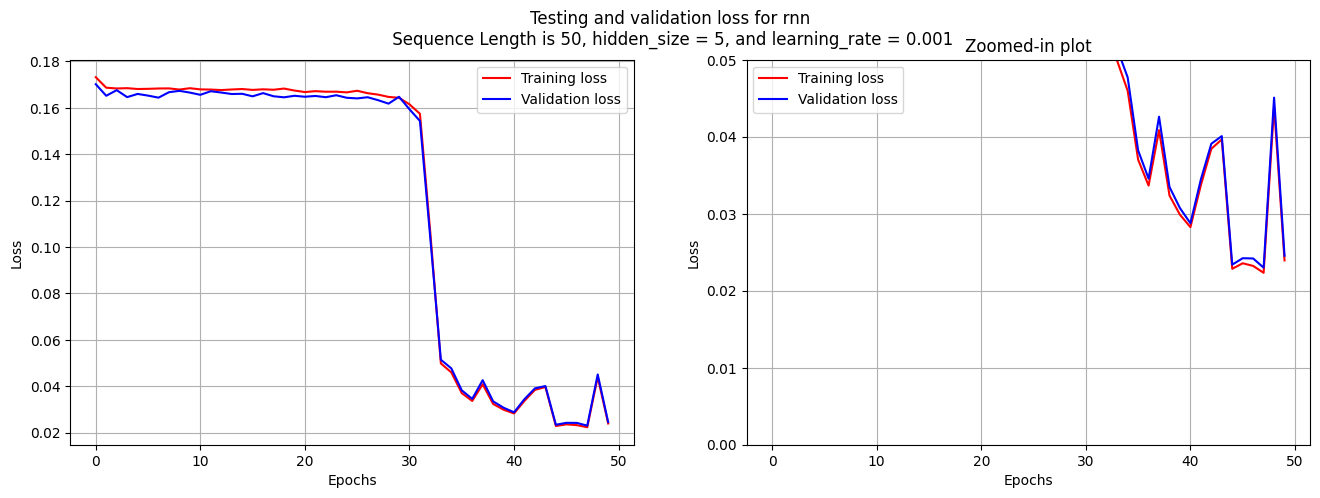

In [6]:
#@title ## 1.4 Find the best **vanilla RNN** model for the dataset with sequence_length=50

reload(models)
reload(train)
reload(make_dataset)
reload(TrainRNN)


# What should be the value of RNN_input_size and RNN_output_size?
RNN_input_size = 2
RNN_output_size = 1

# Performed a grid search over the hyperparameters below
opt_name = 'adam' # let's stick to adam.
RNN_hidden_size = 5 # choose from 5, or 25
learning_rate = 0.001 # choose from 0.1, 0.01, or 0.001

RNNmodel50, train_loss50, val_loss50 = \
  TrainRNN.train1LayerVanillaRNN(Add50Trainset,
                                   Add50Valset,
                                   RNN_input_size,
                                   RNN_output_size,
                                   RNN_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   batch_size=64,
                                   max_epoch=50)

# Plot the loss value for train/test set for each epoch
util.plot_loss(train_loss50,
          val_loss50,
          sequence_len=50,
          hidden_size=RNN_hidden_size,
          lr=learning_rate,
          model_type='rnn')

Epoch 1 -------------------
Train Avg loss: 0.162657
Test  Avg loss: 0.154519
Epoch 2 -------------------
Train Avg loss: 0.011849
Test  Avg loss: 0.011664
Epoch 3 -------------------
Train Avg loss: 0.002046
Test  Avg loss: 0.001967
Epoch 4 -------------------
Train Avg loss: 0.001159
Test  Avg loss: 0.001164
Epoch 5 -------------------
Train Avg loss: 0.000778
Test  Avg loss: 0.000794
Epoch 6 -------------------
Train Avg loss: 0.000577
Test  Avg loss: 0.000604
Epoch 7 -------------------
Train Avg loss: 0.001041
Test  Avg loss: 0.001086
Epoch 8 -------------------
Train Avg loss: 0.000445
Test  Avg loss: 0.000475
Epoch 9 -------------------
Train Avg loss: 0.000855
Test  Avg loss: 0.000851
Epoch 10 -------------------
Train Avg loss: 0.000351
Test  Avg loss: 0.000366
Epoch 11 -------------------
Train Avg loss: 0.000490
Test  Avg loss: 0.000512
Epoch 12 -------------------
Train Avg loss: 0.000266
Test  Avg loss: 0.000270
Epoch 13 -------------------
Train Avg loss: 0.000240
Test  A

Train Avg loss: 0.000242
Test  Avg loss: 0.000241
Done!


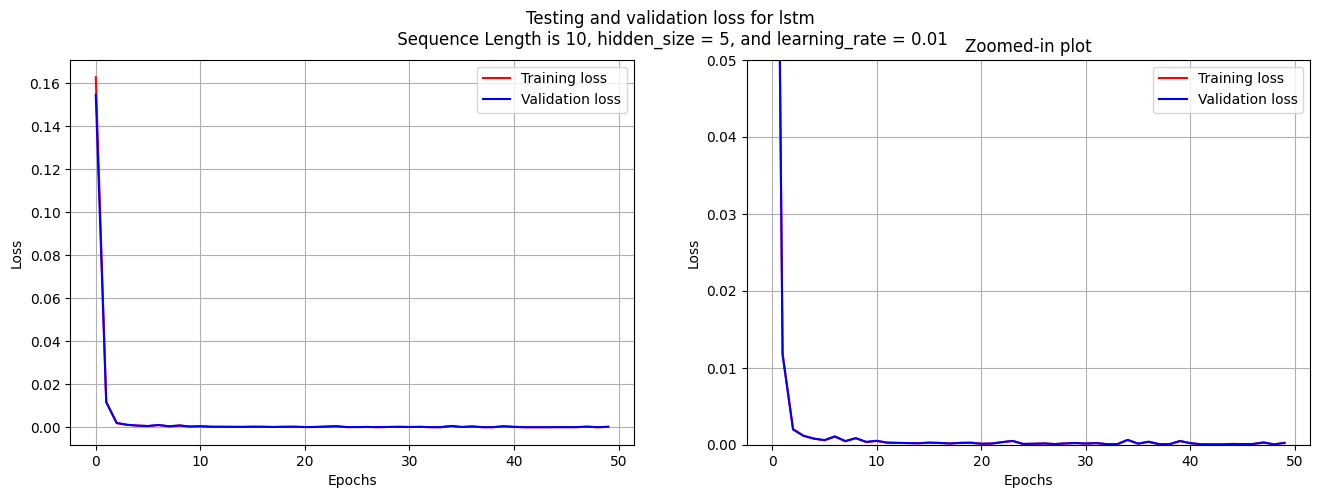

In [ ]:
#@title ## 1.5 Find the best **LSTM** model for the dataset with sequence_length=10

reload(models)
reload(train)
reload(make_dataset)
reload(TrainLSTM)


# What should be the value of LSTM_input_size and LSTM_output_size?
LSTM_input_size = 2
LSTM_output_size = 1

# Performed a grid search over the hyperparameters below
LSTM_hidden_size = 5 # choose from 2 or 5
opt_name = 'adam' # choose from 'sgd' or 'adam'
learning_rate = 0.01 # choose from 0.1, 0.01, or 0.001

LSTM_model10, lstm_train_loss10, lstm_val_loss10 = \
  TrainLSTM.train1LayerLSTM(Add10Trainset,
                                   Add10Valset,
                                   LSTM_input_size,
                                   LSTM_output_size,
                                   LSTM_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   max_epoch=50,
                                   batch_size=64)

# Plot the loss value for train/test set for each epoch
util.plot_loss(lstm_train_loss10,
          lstm_val_loss10,
          sequence_len=10,
          hidden_size=LSTM_hidden_size,
          lr=learning_rate,
          model_type='lstm')

Epoch 1 -------------------
Train Avg loss: 0.169285
Test  Avg loss: 0.157193
Epoch 2 -------------------
Train Avg loss: 0.169721
Test  Avg loss: 0.159454
Epoch 3 -------------------
Train Avg loss: 0.168882
Test  Avg loss: 0.158217
Epoch 4 -------------------
Train Avg loss: 0.168843
Test  Avg loss: 0.159150
Epoch 5 -------------------
Train Avg loss: 0.168516
Test  Avg loss: 0.159355
Epoch 6 -------------------
Train Avg loss: 0.164960
Test  Avg loss: 0.157099
Epoch 7 -------------------
Train Avg loss: 0.163275
Test  Avg loss: 0.158769
Epoch 8 -------------------
Train Avg loss: 0.146891
Test  Avg loss: 0.144791
Epoch 9 -------------------
Train Avg loss: 0.008942
Test  Avg loss: 0.009445
Epoch 10 -------------------
Train Avg loss: 0.004642
Test  Avg loss: 0.004738
Epoch 11 -------------------
Train Avg loss: 0.002479
Test  Avg loss: 0.002632
Epoch 12 -------------------
Train Avg loss: 0.001448
Test  Avg loss: 0.001540
Epoch 13 -------------------
Train Avg loss: 0.001000
Test  A

Train Avg loss: 0.000107
Test  Avg loss: 0.000110
Done!


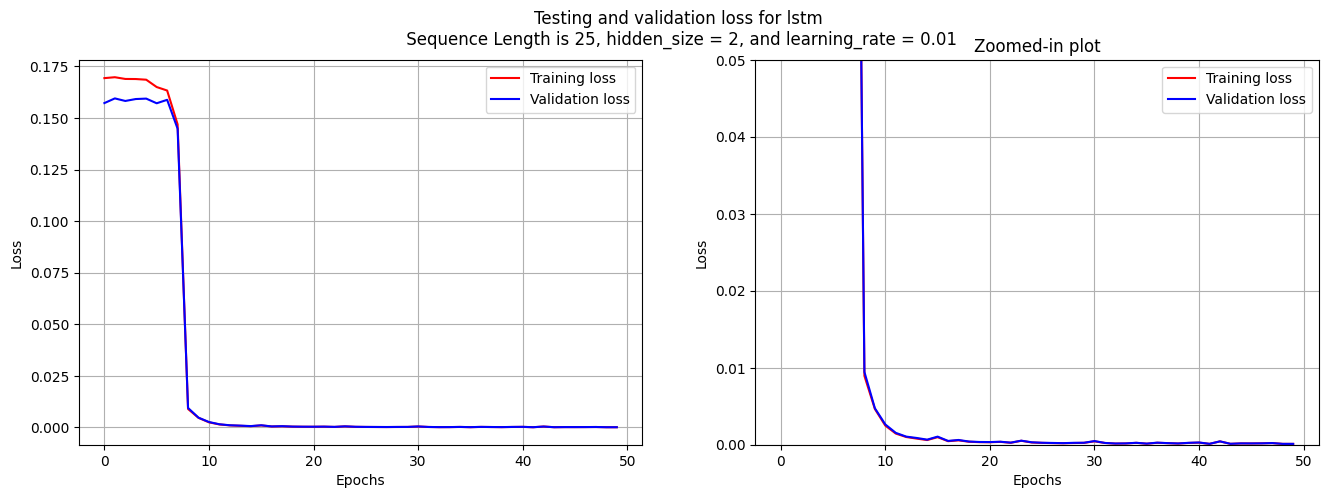

In [ ]:
#@title ## 1.6 Find the best **LSTM** model for the dataset with sequence_length=25

reload(models)
reload(train)
reload(make_dataset)
reload(TrainLSTM)


# What should be the value of LSTM_input_size and LSTM_output_size?
LSTM_input_size = 2
LSTM_output_size = 1

# Performed a grid search over the hyperparameters below
LSTM_hidden_size = 2 # choose from 2 or 5
opt_name = 'adam' # choose from 'sgd' or 'adam'
learning_rate = 0.01 # choose from 0.1, 0.01, or 0.001

LSTM_model25, lstm_train_loss25, lstm_val_loss25 = \
  TrainLSTM.train1LayerLSTM(Add25Trainset,
                                   Add25Valset,
                                   LSTM_input_size,
                                   LSTM_output_size,
                                   LSTM_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   max_epoch=50,
                                   batch_size=64)

# Plot the loss value for train/test set for each epoch
util.plot_loss(lstm_train_loss25,
          lstm_val_loss25,
          sequence_len=25,
          hidden_size=LSTM_hidden_size,
          lr=learning_rate,
          model_type='lstm')

Epoch 1 -------------------
Train Avg loss: 0.160670
Test  Avg loss: 0.155087
Epoch 2 -------------------
Train Avg loss: 0.157250
Test  Avg loss: 0.154312
Epoch 3 -------------------
Train Avg loss: 0.189548
Test  Avg loss: 0.193996
Epoch 4 -------------------
Train Avg loss: 0.075670
Test  Avg loss: 0.072677
Epoch 5 -------------------
Train Avg loss: 0.086295
Test  Avg loss: 0.082714
Epoch 6 -------------------
Train Avg loss: 0.167929
Test  Avg loss: 0.170575
Epoch 7 -------------------
Train Avg loss: 0.156938
Test  Avg loss: 0.154914
Epoch 8 -------------------
Train Avg loss: 0.155699
Test  Avg loss: 0.154389
Epoch 9 -------------------
Train Avg loss: 0.151761
Test  Avg loss: 0.151292
Epoch 10 -------------------
Train Avg loss: 0.154157
Test  Avg loss: 0.154880
Epoch 11 -------------------
Train Avg loss: 0.182480
Test  Avg loss: 0.189226
Epoch 12 -------------------
Train Avg loss: 0.152083
Test  Avg loss: 0.150924
Epoch 13 -------------------
Train Avg loss: 0.096153
Test  A

Train Avg loss: 0.002828
Test  Avg loss: 0.002766
Done!


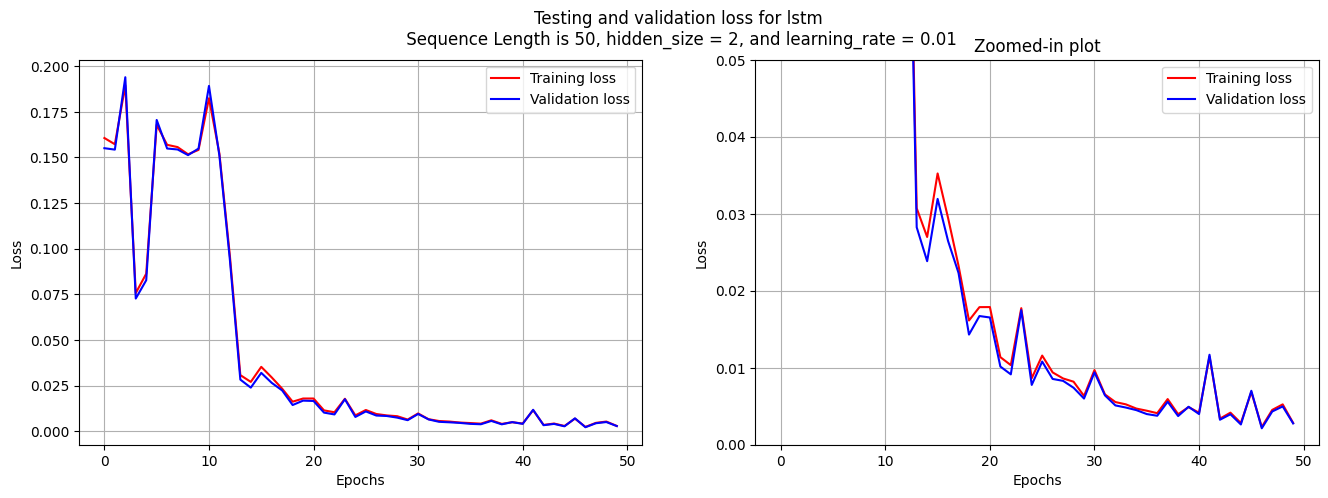

In [ ]:
#@title ## 1.7 Find the best **LSTM** model for the dataset with sequence_length=50

reload(models)
reload(train)
reload(make_dataset)
reload(TrainLSTM)


# What should be the value of LSTM_input_size and LSTM_output_size?
LSTM_input_size = 2
LSTM_output_size = 1

# Performed a grid search over the hyperparameters below
LSTM_hidden_size = 2 # choose from 2 or 5
opt_name = 'adam' # choose from 'sgd' or 'adam'
learning_rate = 0.01 # choose from 0.1, 0.01, or 0.001

LSTM_model50, lstm_train_loss50, lstm_val_loss50 = \
  TrainLSTM.train1LayerLSTM(Add50Trainset,
                                   Add50Valset,
                                   LSTM_input_size,
                                   LSTM_output_size,
                                   LSTM_hidden_size,
                                   optimizer_name=opt_name,
                                   lr=learning_rate,
                                   max_epoch=50,
                                   batch_size=64)

# Plot the loss value for train/test set for each epoch
util.plot_loss(lstm_train_loss50,
          lstm_val_loss50,
          sequence_len=50,
          hidden_size=LSTM_hidden_size,
          lr=learning_rate,
          model_type='lstm')